In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install segmentation_models_pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from  torchvision.models.segmentation import  deeplabv3_resnet50
import os
import segmentation_models_pytorch as smp
import os
from numpy import asarray
import numpy as np
from PIL import Image
#/content/drive/Shareddrives/ACM_Project_Team_3 


# Raw images
#/content/drive/Shareddrives/ACM_Project_Team_3/HYTA-master/images/training

# Labels 
# /content/drive/Shareddrives/ACM_Project_Team_3/HYTA-master/3GT/training


from torch.utils.data import Dataset
from natsort import natsorted

def getDataStats(folder):
  min_abs = 1
  max_abs = 0
  mean_sum = 0
  std_sum = 0
  i = 0
  for image in os.listdir(folder):
    #try:
      img_loc = os.path.join(folder, image)
      image = Image.open(img_loc).convert("RGB")
      transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
      tensor_image = transform(image)
      mean, std, max_, min_ = tensor_image.mean([1,2]), tensor_image.std([1,2]), tensor_image.max(), tensor_image.min()
      mean_sum += mean
      std_sum += std
      i += 1
      min_abs = min(min_abs, min_)
      max_abs = max(max_abs, max_)
      if (max_ < 0 or min_ < 0):
        print(image, min, max)
    #except:
    #  print(image, "failed")
    #  continue
  mean = mean_sum / i
  std = std_sum / i
  return mean, std, min_abs, max_abs


class CustomDataSet(Dataset):
    def __init__(self, main_dir, label_dir, transform):
        self.main_dir = main_dir
        self.label_dir = label_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        all_segs = os.listdir(main_dir)
        self.total_imgs = natsorted(all_imgs)
        self.total_segs = natsorted(all_segs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        #tensor_image = transform(image)
        #mean, std = tensor_image.mean([1,2]), tensor_image.std([1,2])
        #print(mean, std, type(tensor_image))

        seg_loc = os.path.join(self.label_dir, self.total_segs[idx])
        labeled_image = Image.open(seg_loc).convert("RGB")
        transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
        labeled_image = transform(labeled_image)
        labeled_image = labeled_image.float()
        tensor_image = tensor_image.float()
        return tensor_image, labeled_image

BATCH_SIZE = 32
## transformations  
size = (256, 256)
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size), transforms.Normalize([0.3114, 0.3166, 0.3946], [0.2580, 0.2593, 0.2953])])

rgb_img = '/content/drive/Shareddrives/ACM_Project_Team_3/WSISEG-Database-master/whole sky images'
seg_img = '/content/drive/Shareddrives/ACM_Project_Team_3/WSISEG-Database-master/annotation'
#UNCOMMENT TO FIND MEAN AND STD OF DATASET
#mean, std = getDataStats(rgb_img)
#print("mean and std before normalize:")
#print("Mean of the image:", mean)
#print("Std of the image:", std)


## download and load training dataset
imagenet_data = CustomDataSet(rgb_img, seg_img, transform=transform)
trainloader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=2,)

rgb_img = '/content/drive/Shareddrives/ACM_Project_Team_3/HYTA-master/3GT/training'
seg_img = '/content/drive/Shareddrives/ACM_Project_Team_3/HYTA-master/images/training'
## download and load training dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(size), transforms.Normalize([0.3663, 0.4620, 0.5813], [0.1548, 0.1313, 0.1024])])
imagenet_data = CustomDataSet(rgb_img, seg_img, transform=transform)
testloader = torch.utils.data.DataLoader(imagenet_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=2)

#rgb_img_t = '/content/drive/MyDrive/Highway_Dataset/Test/TestSeq04/image'
#seg_img_t = '/content/drive/MyDrive/Highway_Dataset/Test/TestSeq04/label'
### download and load training dataset
#imagenet_data_test = CustomDataSet(rgb_img_t, seg_img_t, transform=transform)
#testloader = torch.utils.data.DataLoader(imagenet_data_test,
#                                          batch_size=BATCH_SIZE,
#                                          shuffle=False,
#                                          num_workers=2)
#

for images, labels in trainloader:
    print("batch size:", images.shape)

     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 376 kB 16.5 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=2e1a483471661aa94174407c3173b25da990b32c60f6f4ab0917a5adfdaf90a9
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=c20007f7e991e7a4271ad447ec6390ffd997c05811b7693d1eed89cd6a0414e1
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels
batch size: torch.Size([32, 3, 256, 256])
batch size: torch.Size([32, 3, 256, 256])
batch size: torch.Size([32, 3, 256, 256])
batch size: torch.Size([32, 3, 256, 256])
batch size: torch.Size([32, 3, 256, 256])
b

In [8]:
import segmentation_models_pytorch as smp
learning_rate = 0.1
num_epochs = 10

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model = MyModel()
#model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
# model to eval() model and load onto computation devicce
#model.eval().to(device)
#model = model.to(device)
model = smp.MAnet(
    encoder_name="resnet34",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    classes=3,
    in_channels=3,
    #encoder_depth=5
)

from segmentation_models_pytorch.encoders import get_preprocessing_fn

preprocess_input = get_preprocessing_fn('resnet34', pretrained='imagenet')

for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    pr_mask = out.sigmoid()
    print(out.shape, labels.shape)
    break

criterion = nn.MSELoss()

loss = smp.utils.losses.DiceLoss()
   
# using multiple metrics to train the model
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
    smp.utils.metrics.Fscore(threshold=0.5),
    smp.utils.metrics.Accuracy(threshold=0.5),
    smp.utils.metrics.Recall(threshold=0.5),
    smp.utils.metrics.Precision(threshold=0.5),
]

# Using Adam optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.000075) #310

DEVICE = 'cpu'

train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)


## Model
#ENCODER = 'se_resnext50_32x4d'
#ENCODER_WEIGHTS = 'imagenet'
#CLASSES = ['car']
#ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation
#DEVICE = 'cpu' # did not get 'cuda' doesn't work
#
## create segmentation model with pretrained encoder
#model = smp.FPN(
#    encoder_name=ENCODER, 
#    encoder_weights=ENCODER_WEIGHTS, 
#    classes=len(CLASSES), 
#    activation=ACTIVATION,
#)
#
#preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)



max_score = 0
count = 0
for i in range(0, 15):

  print('\nEpoch: {}'.format(i))
  train_logs = train_epoch.run(trainloader)
  valid_logs = valid_epoch.run(trainloader)#testloader)
  
  # do something (save model, change lr, etc.)
  if max_score < valid_logs['iou_score']:
      max_score = valid_logs['iou_score']
      torch.save(model, './best_model-MAnet#5.pth')
      print('Model saved!')
  else:
     
     break 
      
  #if i == 3:
  #    optimizer.param_groups[0]['lr'] = 1e-5
  #    print('Decrease decoder learning rate to 1e-5!')
  model.eval()  

batch size: torch.Size([32, 3, 256, 256])
torch.Size([32, 3, 256, 256]) torch.Size([32, 3, 256, 256])

Epoch: 0
valid: 100%|██████████| 13/13 [02:32<00:00, 11.76s/it, dice_loss - 0.07742, iou_score - 0.4386, fscore - 0.6091, accuracy - 0.5041, recall - 0.5221, precision - 0.7318]
Model saved!

Epoch: 1
valid: 100%|██████████| 13/13 [02:28<00:00, 11.40s/it, dice_loss - -0.3407, iou_score - 0.5553, fscore - 0.7135, accuracy - 0.5601, recall - 0.675, precision - 0.7571]
Model saved!

Epoch: 2
valid: 100%|██████████| 13/13 [02:26<00:00, 11.29s/it, dice_loss - -0.4748, iou_score - 0.6081, fscore - 0.7554, accuracy - 0.5895, recall - 0.7223, precision - 0.7925]
Model saved!

Epoch: 3
valid: 100%|██████████| 13/13 [02:27<00:00, 11.33s/it, dice_loss - -0.5577, iou_score - 0.6307, fscore - 0.7726, accuracy - 0.6077, recall - 0.7108, precision - 0.8473]
Model saved!

Epoch: 4
valid: 100%|██████████| 13/13 [02:25<00:00, 11.20s/it, dice_loss - -0.6152, iou_score - 0.6438, fscore - 0.7827, accuracy

In [27]:
import matplotlib.pyplot as plt
#https://github.com/qubvel/segmentation_models.pytorch/blob/master/examples/binary_segmentation_intro.ipynb

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5397, 0.5292, 0.4325,  ..., 0.2451, 0.2835, 0.3977],
         [0.4582, 0.2371, 0.1550,  ..., 0.1422, 0.1875, 0.4034],
         [0.3980, 0.1742, 0.0974,  ..., 0.0837, 0.1924, 0.3740],
         ...,
     

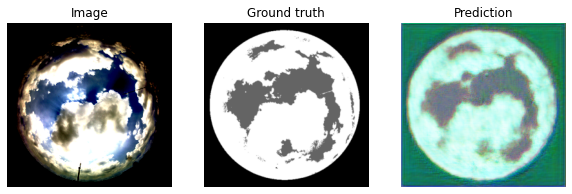

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5133, 0.5148, 0.4213,  ..., 0.2336, 0.2703, 0.3801],
         [0.4821, 0.2306, 0.1571,  ..., 0.1526, 0.1995, 0.3987],
         [0.3959, 0.1553, 0.0910,  ..., 0.0782, 0.1807, 0.3614],
         ...,
     

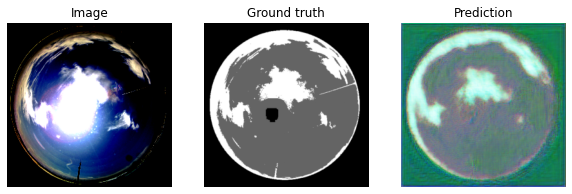

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5138, 0.4991, 0.4174,  ..., 0.2402, 0.2810, 0.3928],
         [0.4657, 0.2358, 0.1682,  ..., 0.1587, 0.2133, 0.4126],
         [0.3945, 0.1551, 0.0918,  ..., 0.0981, 0.2014, 0.3757],
         ...,
     

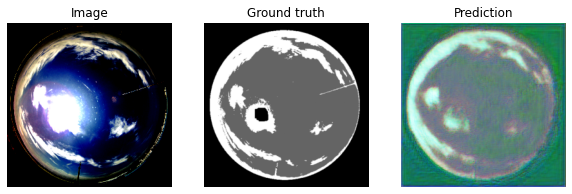

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5182, 0.5328, 0.4440,  ..., 0.2490, 0.2877, 0.3965],
         [0.4569, 0.2269, 0.1534,  ..., 0.1244, 0.1722, 0.3943],
         [0.3926, 0.1738, 0.1057,  ..., 0.0884, 0.1988, 0.3716],
         ...,
     

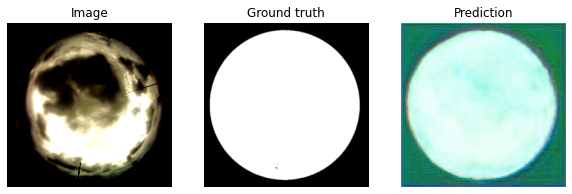

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5112, 0.4805, 0.4021,  ..., 0.2353, 0.2758, 0.3965],
         [0.4904, 0.2577, 0.1793,  ..., 0.1645, 0.2256, 0.4374],
         [0.4004, 0.1648, 0.0994,  ..., 0.0949, 0.2007, 0.3855],
         ...,
     

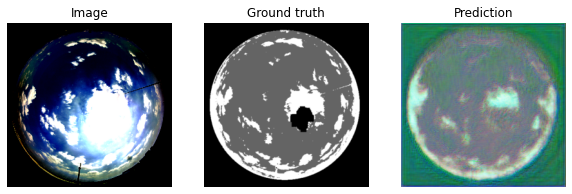

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5329, 0.5227, 0.4269,  ..., 0.2388, 0.2735, 0.3861],
         [0.4557, 0.2318, 0.1552,  ..., 0.1505, 0.1963, 0.4020],
         [0.3963, 0.1683, 0.0982,  ..., 0.0810, 0.1852, 0.3676],
         ...,
     

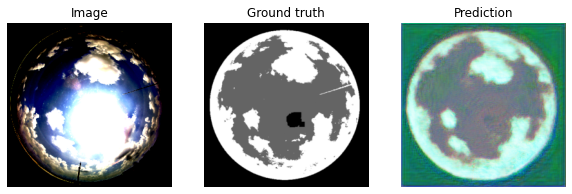

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5155, 0.5053, 0.4228,  ..., 0.2391, 0.2727, 0.3829],
         [0.4717, 0.2379, 0.1638,  ..., 0.1471, 0.1986, 0.3967],
         [0.3962, 0.1595, 0.0938,  ..., 0.0778, 0.1785, 0.3551],
         ...,
     

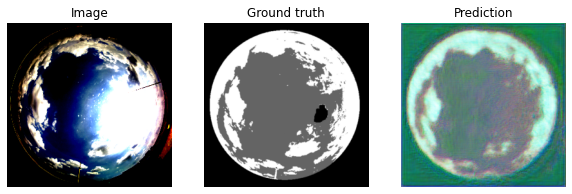

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5376, 0.5209, 0.4142,  ..., 0.2430, 0.2828, 0.3961],
         [0.4700, 0.2382, 0.1569,  ..., 0.1418, 0.1949, 0.4066],
         [0.3995, 0.1714, 0.0959,  ..., 0.0845, 0.1900, 0.3724],
         ...,
     

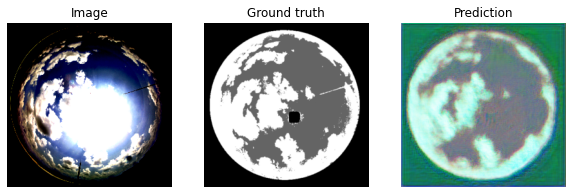

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5096, 0.4814, 0.4055,  ..., 0.2501, 0.2712, 0.3991],
         [0.5068, 0.2845, 0.2011,  ..., 0.1440, 0.2060, 0.4113],
         [0.3990, 0.1800, 0.1050,  ..., 0.0997, 0.1977, 0.3636],
         ...,
     

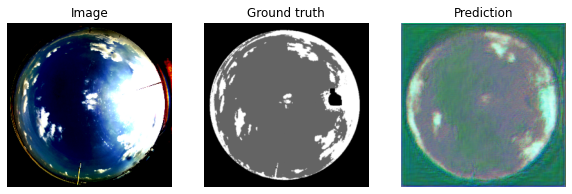

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5382, 0.5394, 0.4354,  ..., 0.2501, 0.2901, 0.3998],
         [0.4524, 0.2297, 0.1461,  ..., 0.1290, 0.1744, 0.3957],
         [0.3882, 0.1679, 0.0976,  ..., 0.0895, 0.1949, 0.3691],
         ...,
     

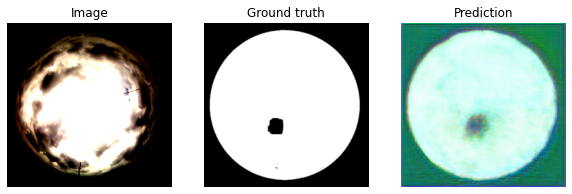

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5249, 0.5299, 0.4374,  ..., 0.2427, 0.2812, 0.3923],
         [0.4681, 0.2286, 0.1539,  ..., 0.1513, 0.2019, 0.4000],
         [0.4035, 0.1624, 0.0952,  ..., 0.0840, 0.1870, 0.3634],
         ...,
     

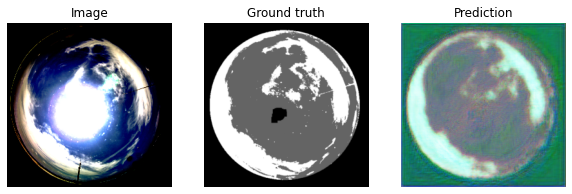

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5396, 0.5317, 0.4302,  ..., 0.2479, 0.2928, 0.4102],
         [0.4493, 0.2237, 0.1459,  ..., 0.1297, 0.1834, 0.4087],
         [0.3937, 0.1641, 0.0987,  ..., 0.0911, 0.1970, 0.3732],
         ...,
     

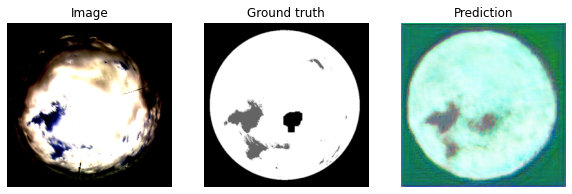

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5385, 0.5488, 0.4439,  ..., 0.2548, 0.2956, 0.4080],
         [0.4562, 0.2407, 0.1586,  ..., 0.1332, 0.1811, 0.4068],
         [0.3928, 0.1889, 0.1105,  ..., 0.0940, 0.1990, 0.3809],
         ...,
     

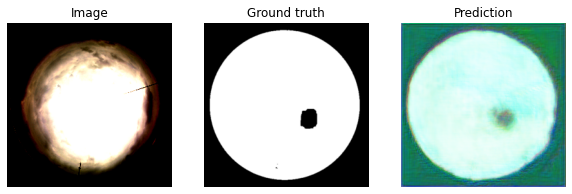

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5112, 0.4951, 0.4140,  ..., 0.2337, 0.2756, 0.3897],
         [0.4951, 0.2615, 0.1752,  ..., 0.1522, 0.2012, 0.4028],
         [0.4006, 0.1714, 0.0990,  ..., 0.0788, 0.1857, 0.3607],
         ...,
     

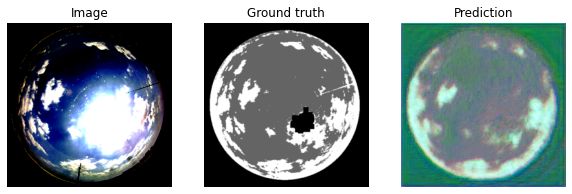

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5331, 0.5294, 0.4329,  ..., 0.2389, 0.2783, 0.3894],
         [0.4631, 0.2300, 0.1487,  ..., 0.1357, 0.1779, 0.3864],
         [0.3992, 0.1658, 0.0958,  ..., 0.0766, 0.1782, 0.3533],
         ...,
     

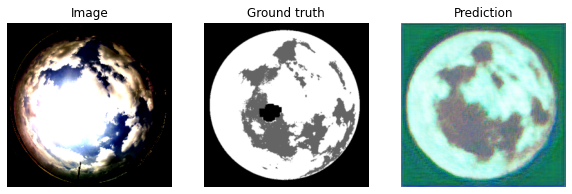

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5257, 0.5123, 0.4211,  ..., 0.2341, 0.2700, 0.3863],
         [0.4625, 0.2382, 0.1620,  ..., 0.1479, 0.1942, 0.4015],
         [0.3967, 0.1713, 0.0979,  ..., 0.0809, 0.1783, 0.3668],
         ...,
     

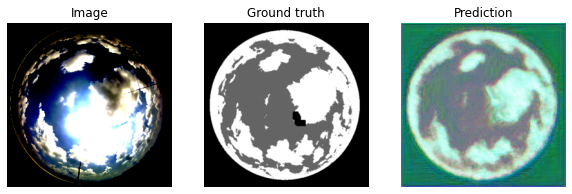

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5157, 0.4956, 0.4166,  ..., 0.2382, 0.2806, 0.3974],
         [0.4879, 0.2603, 0.1792,  ..., 0.1480, 0.2060, 0.4118],
         [0.3974, 0.1696, 0.1012,  ..., 0.0854, 0.1889, 0.3634],
         ...,
     

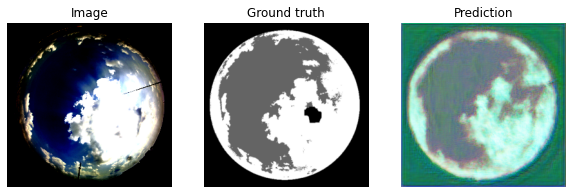

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5268, 0.5123, 0.4231,  ..., 0.2380, 0.2689, 0.3848],
         [0.4681, 0.2467, 0.1654,  ..., 0.1474, 0.1938, 0.4011],
         [0.4005, 0.1712, 0.0972,  ..., 0.0803, 0.1838, 0.3666],
         ...,
     

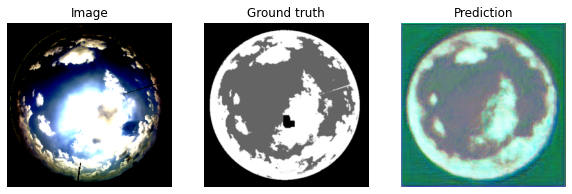

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5222, 0.5142, 0.4131,  ..., 0.2363, 0.2699, 0.3819],
         [0.4704, 0.2299, 0.1563,  ..., 0.1505, 0.1959, 0.3885],
         [0.4013, 0.1598, 0.0942,  ..., 0.0809, 0.1794, 0.3476],
         ...,
     

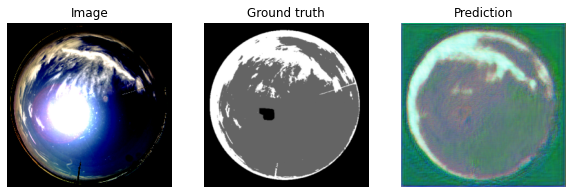

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5168, 0.5012, 0.4242,  ..., 0.2361, 0.2808, 0.3938],
         [0.4854, 0.2648, 0.1803,  ..., 0.1520, 0.2024, 0.3960],
         [0.4059, 0.1748, 0.1074,  ..., 0.0786, 0.1784, 0.3484],
         ...,
     

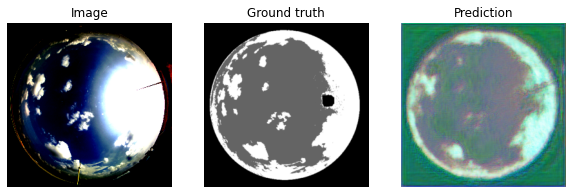

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5261, 0.5275, 0.4384,  ..., 0.2344, 0.2755, 0.4072],
         [0.4644, 0.2332, 0.1542,  ..., 0.1420, 0.1935, 0.4178],
         [0.3942, 0.1686, 0.0986,  ..., 0.0870, 0.1972, 0.3829],
         ...,
     

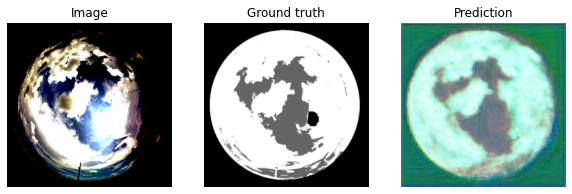

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5325, 0.5300, 0.4303,  ..., 0.2454, 0.2876, 0.3974],
         [0.4582, 0.2304, 0.1537,  ..., 0.1354, 0.1785, 0.3949],
         [0.3925, 0.1683, 0.0986,  ..., 0.0802, 0.1836, 0.3626],
         ...,
     

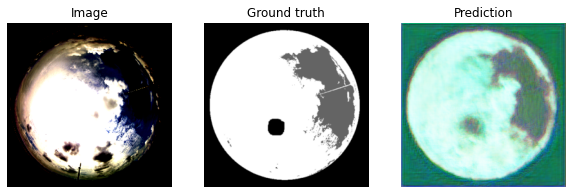

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5332, 0.5272, 0.4312,  ..., 0.2442, 0.2834, 0.3995],
         [0.4588, 0.2259, 0.1474,  ..., 0.1375, 0.1831, 0.4027],
         [0.3887, 0.1605, 0.0944,  ..., 0.0824, 0.1908, 0.3736],
         ...,
     

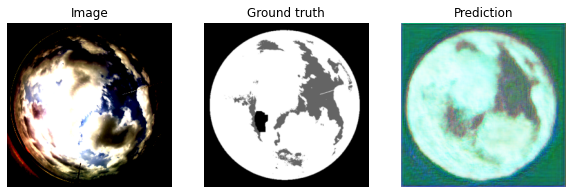

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5299, 0.5165, 0.4244,  ..., 0.2444, 0.2826, 0.3864],
         [0.4736, 0.2438, 0.1580,  ..., 0.1471, 0.1877, 0.3952],
         [0.4002, 0.1720, 0.0959,  ..., 0.0791, 0.1794, 0.3605],
         ...,
     

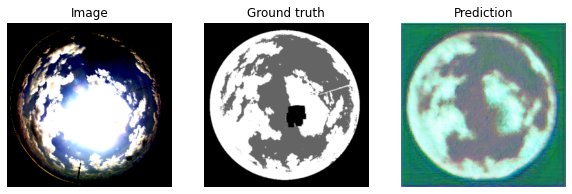

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5280, 0.5297, 0.4323,  ..., 0.2460, 0.2756, 0.3860],
         [0.4654, 0.2293, 0.1501,  ..., 0.1462, 0.1874, 0.3934],
         [0.3996, 0.1686, 0.1006,  ..., 0.0849, 0.1836, 0.3620],
         ...,
     

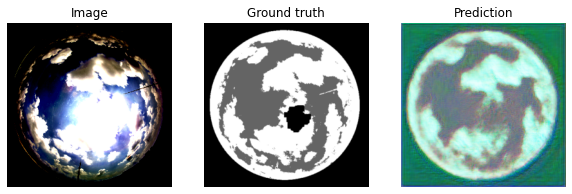

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5412, 0.5181, 0.4066,  ..., 0.2385, 0.2757, 0.3904],
         [0.4566, 0.2269, 0.1500,  ..., 0.1487, 0.1920, 0.4016],
         [0.3965, 0.1649, 0.0936,  ..., 0.0826, 0.1833, 0.3716],
         ...,
     

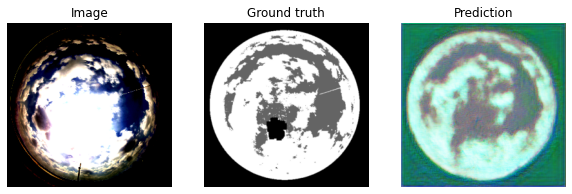

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5165, 0.5095, 0.4262,  ..., 0.2388, 0.2739, 0.3812],
         [0.4650, 0.2420, 0.1675,  ..., 0.1560, 0.2017, 0.3991],
         [0.3953, 0.1646, 0.0944,  ..., 0.0800, 0.1823, 0.3626],
         ...,
     

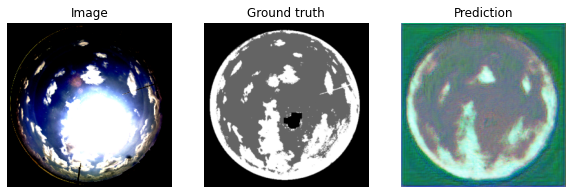

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5156, 0.5127, 0.4226,  ..., 0.2403, 0.2742, 0.3861],
         [0.4708, 0.2384, 0.1627,  ..., 0.1531, 0.1979, 0.3940],
         [0.3954, 0.1686, 0.0993,  ..., 0.0829, 0.1822, 0.3608],
         ...,
     

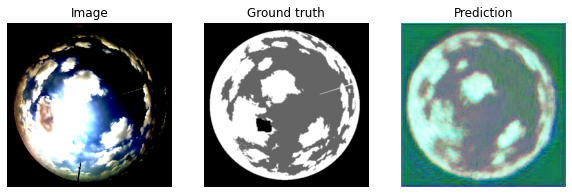

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5141, 0.4874, 0.4050,  ..., 0.2454, 0.2794, 0.3934],
         [0.5013, 0.2802, 0.1955,  ..., 0.1547, 0.2198, 0.4060],
         [0.4016, 0.1811, 0.1079,  ..., 0.0977, 0.2000, 0.3602],
         ...,
     

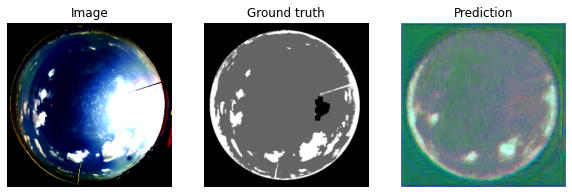

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5343, 0.5411, 0.4358,  ..., 0.2491, 0.2909, 0.3981],
         [0.4546, 0.2321, 0.1560,  ..., 0.1315, 0.1741, 0.3942],
         [0.3950, 0.1855, 0.1100,  ..., 0.0842, 0.1916, 0.3666],
         ...,
     

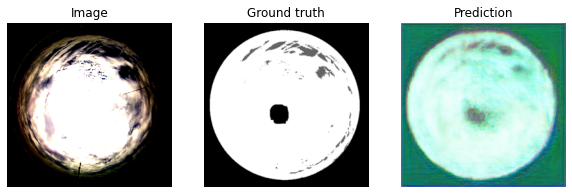

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5296, 0.5381, 0.4439,  ..., 0.2374, 0.2870, 0.4044],
         [0.4644, 0.2413, 0.1577,  ..., 0.1297, 0.1785, 0.3962],
         [0.3967, 0.1788, 0.1000,  ..., 0.0814, 0.1852, 0.3597],
         ...,
     

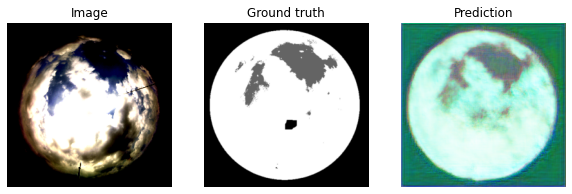

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[[0.5187, 0.4992, 0.4141,  ..., 0.2388, 0.2707, 0.3835],
         [0.4637, 0.2345, 0.1641,  ..., 0.1573, 0.2016, 0.3921],
         [0.3877, 0.1564, 0.0882,  ..., 0.0821, 0.1749, 0.3475],
         ...,
     

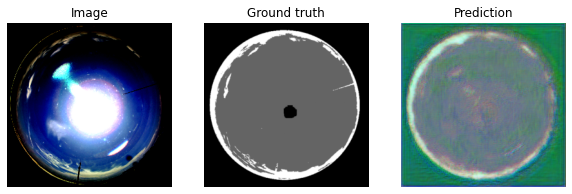

In [37]:
batch = next(iter(trainloader))
with torch.no_grad():
    model.eval()
    logits = model(batch[0])
pr_masks = logits.sigmoid()

for image, gt_mask, pr_mask in zip(batch[0], batch[1], pr_masks):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image.numpy().transpose(1, 2, 0))  # convert CHW -> HWC
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    print(gt_mask)
    plt.imshow(gt_mask.numpy().transpose(1, 2, 0).squeeze()) # just squeeze classes dim, because we have only one class
    plt.title("Ground truth")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    print(pr_mask)
    plt.imshow(pr_mask.numpy().transpose(1, 2, 0).squeeze()) # just squeeze classes dim, because we have only one class
    plt.title("Prediction")
    plt.axis("off")

    plt.show()

In [ ]:
display(prediction)
ground_truth = Image.open(seg_img).convert("RGB")
display(ground_truth)

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)
        self.convUp1 = nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=3)
        self.upSampling = nn.Upsample(in_channels=3, out_channels=3, kernel_size=3)
        self.drop1 = nn.Dropout(0.2)
        self.pool1 = nn.MaxPool2d((2,2))

    def layerDown(self, x):
        x = self.conv1(x)
        x = self.drop1(x)
        x = F.relu(x)
        return x
    
    #yet to test this layer design 
    def layerUpTest(self, x):
        x = self.conv1(x)
        x = self.drop1(x)
        x = self.convUp1(x)
        x = F.relu(x)
        return x

    def layerUp(self, x):
        x = self.convUp1(x)
        x = self.drop1(x)
        x = F.relu(x)
        return x
    def forwardBeta(self, x):
        # 32x1x28x28 => 32x32x26x26
        #x = self.layerDown(x)
        #x = self.layerDown(x)
        x = self.layerDown(x)
        x = self.layerDown(x)
        x = self.layerDown(x)
        #x = self.layerUp(x)
        #x = self.layerUp(x)
        x = self.layerUp(x)
        x = self.layerUp(x)
        x = self.layerUp(x)
   

        # flatten => 32 x (32*26*26)
        #x = x.flatten(start_dim = 1)

        #32 x (32*26*26) => 32x128
        #x = self.d1(x)
        #x = F.relu(x)
        #x = x.reshape([32, 3, 28, 28])
        #x = self.d2(x)
        #x = F.relu(x)

        # logits => 32x10
        logits = x
        out = F.softmax(logits, dim=1)
        return out


    def forward(self, x):
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.upSampling(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.upSampling(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.upSampling(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.upSampling(x)
      x = self.conv1(x)
      x = self.conv1(x)
      x = self.upSampling(x)
      x = self.conv1(x)
      x = self.conv1(x)

      logits = x
      out = F.softmax(logits, dim=1)
      return out

  ## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape, labels.shape)
    break

